<h1>Árboles de decisión</h1>

Randall Delgado
<br>
Jake Herrera
<br>
Anthony Leandro

<p style="text-align:justify">Un árbol de decisión es un modelo de predicción utilizado en diversos ámbitos que van desde la inteligencia artificial hasta la Economía. Dado un conjunto de datos se fabrican diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema. </p>

<p style="text-align:justify">Un árbol de decisión toma como entrada un objeto o una situación descrita a través de un conjunto de atributos y devuelve una «decisión»: el valor previsto de la salida dada la entrada. Los atributos de entrada pueden ser discretos o continuos. A partir de ahora, asumiremos entradas discretas. El valor de la salida puede ser a su vez discreto o continuo; aprender una función de valores discretos se denomina clasificación; aprender una 	función continua se denomina regresión. Nos concentraremos en clasificaciones booleanas, en las cuales cada ejemplo se clasifica como verdadero (positivo) o falso (negativo) (Russell & Norvig, 2004, p.744). </p>

<p style="text-align:justify">Un árbol de decisión desarrolla una secuencia de test para poder alcanzar una decisión. Cada nodo interno del árbol corresponde con un test sobre el valor de una de las propiedades, y las ramas que salen del nodo están etiquetadas con los posibles valores de dicha propiedad. Cada nodo hoja 	del árbol representa el valor que ha de ser devuelto si dicho nodo hoja es alcanzado. La representación en forma de árboles de decisión es muy natural para los humanos; en realidad muchos manuales que explican cómo hacer determinadas tareas (por ejemplo, reparar un coche) están escritos en su totalidad como un único árbol de decisión abarcando cientos de páginas (Russell & Norvig, 2004, p.744).</p>


<h2>Pseudocódigo:</h2>

función <b>APRENDIZAJE-ÁRBOL-DECISIÓN(ejemplos, atribs, por-defecto):</b>
<br><br>
<b>devolver</b> árbol de decisión 	
<br>
<b>entradas</b>: 
<br>
<p style='margin-left: 2em'><b>ejemplos:</b> conjunto de ejemplos</p>
<p style='margin-left: 2em'><b>atribs:</b> conjunto de atributos</p>
<p style='margin-left: 2em'><b>por-defecto:</b> valor por defecto del predicado meta</p>
<br>

si <b>ejemplos</b> está vacío:
<p style='margin-left: 2em'>devolver <b>por-defecto</b></p>
<p>si no:</p>
<p style='margin-left: 2em'>si <b>todos</b> los elementos de ejemplos tienen <b>la misma clasificación</b>:</p>
<p style='margin-left: 4em'>devolver <b>clasificación</b></p>
<p style='margin-left: 2em'>si no:</p>
<p style='margin-left: 4em'>si <b>atribs</b> está vacío:</p>
<p style='margin-left: 6em'>devolver <b>VALOR-MAYORÍA(ejemplos)</b></p>
<p style='margin-left: 4em'>si no:</p> 
<p style='margin-left: 6em'>mejor ; <br>
                            <b>ELEGIR-ATRIBUTO(atribs, ejemplos)</b> arbol ; <br>
                            un nuevo árbol de decisión con nodo raíz mejor m ; <br>
                            <b>VALOR-MAYORÍA(ejemplosi)</b> para cada valor vi de mejor hacer ejemplosi ; <br>
                            {elementos de <b>ejemplos</b> con <b>mejor = vi</b> } subarbol ; <br>
                            <b>APRENDIZAJE-ÁRBOL-DECISIÓN(ejemplosi, atribs-mejor, m)</b> ; <br>
                            añadir una rama a arbol con la etiqueta <b>vi</b> y el subárbol <b>subarbol</b> ; <br>
                            devolver <b>arbol</b>
</p>

<h2>Ejemplos:</h2>

In [18]:
#import sys
#!{sys.executable} -m pip install pydotplus
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install collections
#!{sys.executable} -m pip install IPython
#!{sys.executable} -m pip install graphviz
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pillow

#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydotplus
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from IPython.display import Image as PImage

jugadores = pd.read_csv("datos.csv")
jugadores.shape
jugadores.head()



,id','clima','temperatura','humedad','viento','palos','jugar
0,1','lluvioso','frio','normal','no','buenos','si
1,2','lluvioso','frio','normal','si','buenos','no
2,3','nublado','caliente','alta','no','buenos','si
3,4','soleado','templado','alta','no','malos','no
4,5','lluvioso','frio','normal','no','buenos','si


In [19]:
clima={'lluvioso':1,'nublado':2, 'soleado':3}
temperatura={'frio':1, 'caliente':2, 'templado':3}
humedad={'normal':1, 'alta':2}
viento={'no':1,'si':2}
palos={'malos':1, 'buenos':2}

X = [[clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['si'],palos['buenos']],
     [clima['nublado'],temperatura['caliente'],humedad['alta'],viento['no'],palos['buenos']],
     [clima['soleado'],temperatura['templado'],humedad['alta'],viento['no'],palos['malos']],
     [clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['soleado'],temperatura['frio'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['no'],palos['malos']],
     [clima['soleado'],temperatura['caliente'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['nublado'],temperatura['templado'],humedad['alta'],viento['si'],palos['malos']],
     [clima['soleado'],temperatura['templado'],humedad['alta'],viento['si'],palos['buenos']]]

Y = ['si', 'no', 'si', 'no', 'si','si','si','si','si','no'] 

data_feature_names=['clima','temperatura','humedad','viento','palos']


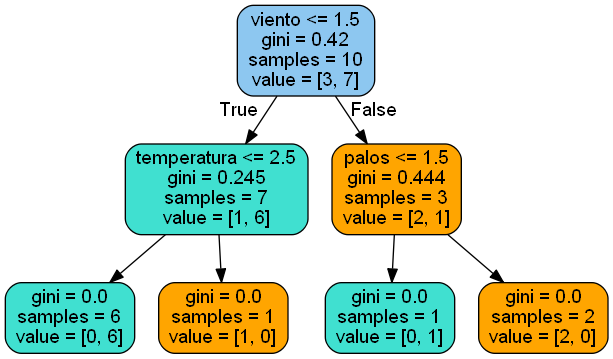

In [20]:
# Training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)                                                             
prediction = clf.predict([clima['soleado'], temperatura['caliente'], humedad['alta'], viento['no'], palos['buenos']])                                         
print(prediction)

# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree.png')
PImage('tree.png')

<h2>Caso prueba</h2>

In [17]:
clf = clf.fit(X, Y)                                              
prediction = clf.predict([[clima['soleado'],temperatura['frio'],humedad['normal'],viento['no'],palos['buenos']]])                                         
print(prediction)

['si']


<h2>Random Forests</h2>

<p style="text-align:justify">El Random Forest es un algoritmo de machine learning supervisado, basado a partir de los árboles de decisión. Se caracteriza por su gran precisión de resultados, y es sumamente utilizado para la clasificación de elementos y regresión. Su método de aprendizaje indica que una combinación de modelos incrementa el resultado global, debido a que su forma de construir y fusionar varios árboles de decisión le permite una predicción más acertada. La ventaja de utilizar los random forests es su flexibilidad, siendo así que es posible su uso para la mayoría de sistemas de aprendizaje. En lugar de buscar el atributo más importante mientras añade nodos en profundidad, busca el mejor atributo de un subconjunto aleatorio (Donges, 2018).</p>

Un ejemplo muy general de esto es:

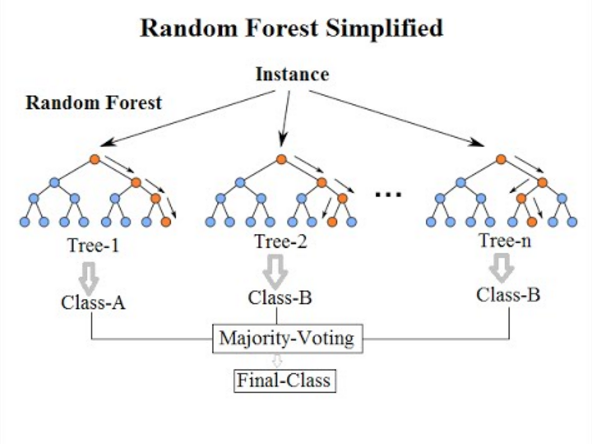
Imagen tomada de: https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png

<p style="text-align:justify">Para tener un mejor entendimiento del concepto, vamos a brindar un ejemplo más específico: Se quiere predecir la temperatura de una zona específica (por ejemplo, el estado o provincia de un país) en un día determinado. Se puede iniciar con un rango de temperaturas (en Farenheit) desde los 30° F hasta los 70° F, lo cual inicia con mucha incertidumbre. Sin embargo, al pasarlo por ciertos atributos o filtros, se pueden llegar a predicciones más certeras poco a poco. Se puede tomar en cuenta la época del año en la que se está, la temperatura promedio o histórica de la zona, o la máxima del día actual (Koehrsen, 2017). Este árbol puede resultar en predicciones como las de la siguiente imagen:</p>

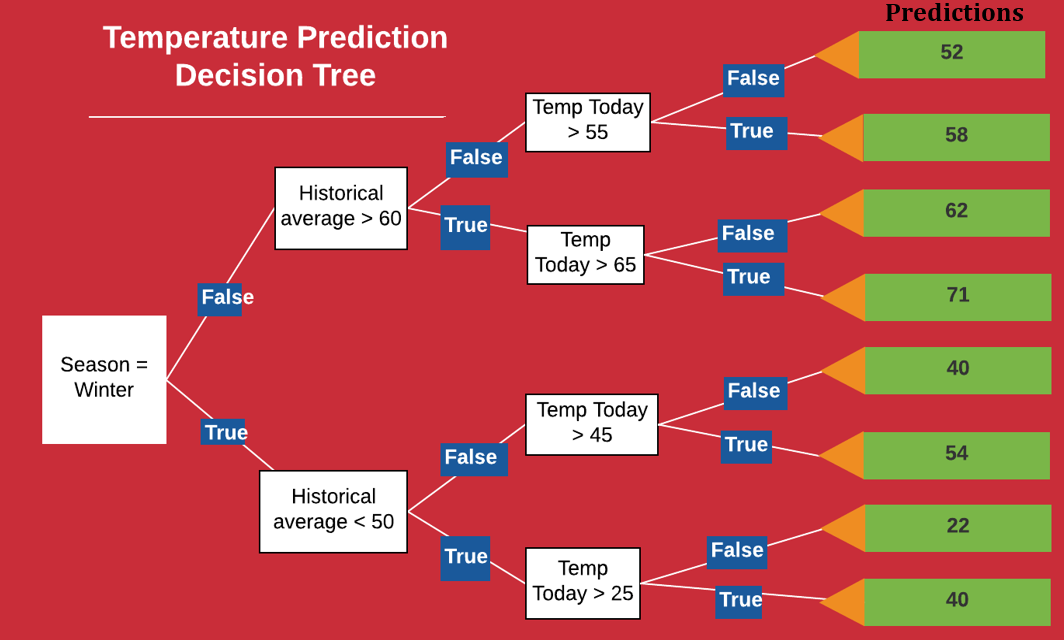
<br>
Imagen tomada de: https://cdn-images-1.medium.com/max/1600/1*H3nZElqhfOE35AFAq8gy0A.png

La diferencia principal entre Random Forest y los árboles de decisión es, aunque suene redundante, la aleatoriedad. Es decir, que mientras un árbol de decisión crea ciertos lineamientos y reglas a partir de un conjunto de datos determinado para hacer las predicciones respectivas, el algoritmo de Random Forest toma características aleatorias y crea árboles de decisión a partir de ellas, para luego promediar los resultados y basar su predicción en ello. Además, gracias a esta diferencia, los Random Forests no se ven perjudicados por el <i>overfitting</i> (Koehrsen, 2017).

<h2>Bibliografía</h2>

Donges, N. (2018). <i>The Random Forest Algorithm</i>. Towards Data Science. Recuperado de: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
<br>
Koehrsen, W. (2017). <i>Random Forest Simple Explanation - Understanding the Random Forest with an intuitive example</i>. Medium. Recuperado de: https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d